In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from geopy.geocoders import Nominatim

%matplotlib inline
sns.set_theme(style="whitegrid")

print("Setup complete. Libraries imported.")

Setup complete. Libraries imported.


## Load the Dataset

In [2]:
df = pd.read_csv('C:/Users/archi/OneDrive/Documents/Coding/Python/Projects/HexSoftwares_Exploratory_Data_Analysis/data/raw/UberDataset.csv')

In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [4]:
print("\nFirst 5 rows")
df.head(5)


First 5 rows


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


In [6]:
print("\nUnique Values in Categorical Columns:")
print("CATEGORY:", df['CATEGORY'].unique())
print("PURPOSE:", df['PURPOSE'].unique())


Unique Values in Categorical Columns:
CATEGORY: ['Business' 'Personal' nan]
PURPOSE: ['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


## Preprocessing and Handling Missing data

In [7]:
def parse_dates(date_str):
    try:
        return pd.to_datetime(date_str, errors='coerce')
    except:
        try:
            return pd.to_datetime(date_str, errors='coerce')
        except:
            return pd.NaT  # Return NaT for unparseable dates


df['START_DATE'] = df['START_DATE'].apply(parse_dates)
df['END_DATE'] = df['END_DATE'].apply(parse_dates)


# Handling Missing data

df['PURPOSE'].fillna("NaN", inplace=True)

# Saving cleaned data
df.to_csv('C:/Users/archi/OneDrive/Documents/Coding/Python/Projects/HexSoftwares_Exploratory_Data_Analysis/data/cleaned/cleaned_data.csv', index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


C:\Users\archi\AppData\Local\Temp\ipykernel_12476\966210106.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NaN", inplace=True)


In [8]:
df.dropna(inplace=True)
df_cleaned = df
df_cleaned

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


## Visualizations

### Frequency of trips by category

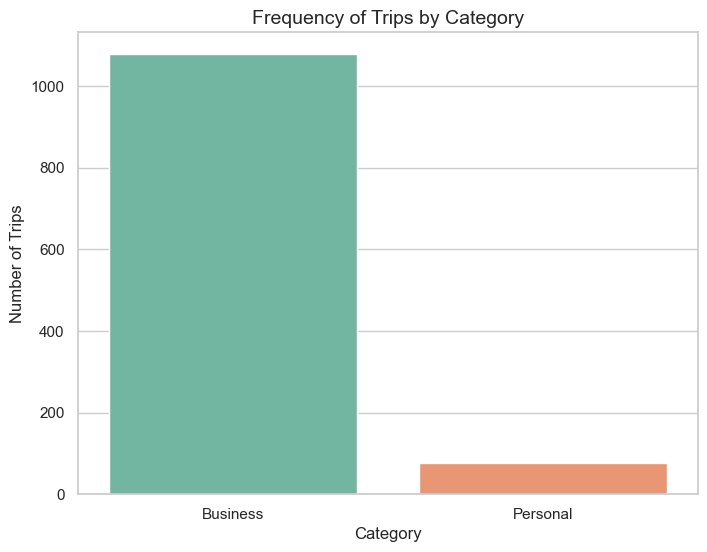


Percentage of Trips by Category:
CATEGORY
Business    93.333333
Personal     6.666667
Name: proportion, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set plot 
sns.set_theme(style="whitegrid")

#bar graph
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='CATEGORY', hue='CATEGORY', palette='Set2', legend=False)
plt.title('Frequency of Trips by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

# Save fig
plt.savefig('C:/Users/archi/OneDrive/Documents/Coding/Python/Projects/HexSoftwares_Exploratory_Data_Analysis/visualizations/category_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Percentage breakdown
category_counts = df['CATEGORY'].value_counts(normalize=True) * 100
print("\nPercentage of Trips by Category:")
print(category_counts)

**Distribution:** From the Above bar graph about 93.33% are business trips while personal trips are 6.66%

### Frequency of Trips by Purpose

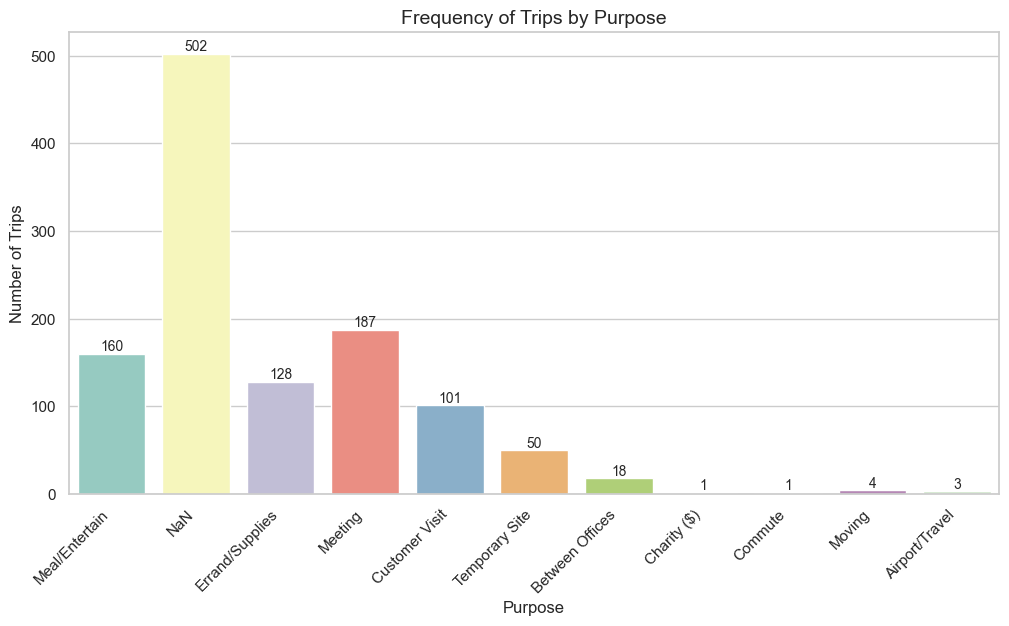


Percentage of Trips by purpose
PURPOSE
NaN                43.463203
Meeting            16.190476
Meal/Entertain     13.852814
Errand/Supplies    11.082251
Customer Visit      8.744589
Temporary Site      4.329004
Between Offices     1.558442
Moving              0.346320
Airport/Travel      0.259740
Commute             0.086580
Charity ($)         0.086580
Name: proportion, dtype: float64


In [10]:
sns.set_theme(style="whitegrid")

# Create bar plot 
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='PURPOSE', hue='PURPOSE', palette='Set3', legend=False)
plt.title('Frequency of Trips by Purpose', fontsize=14)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Save 
plt.savefig('C:/Users/archi/OneDrive/Documents/Coding/Python/Projects/HexSoftwares_Exploratory_Data_Analysis/visualizations/purpose_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Percentage breakdown
purpose_counts = df_cleaned['PURPOSE'].value_counts(normalize=True) * 100
print("\nPercentage of Trips by purpose")
print(purpose_counts)

**Distribution:** From the above graph, neglecting the NaN values, Most trips by purpose constitute for Meeting i.e 183 trips and the next trip to that is for meal/entertainment i.e around 160 trips


### Average Trip Distance by Purpose

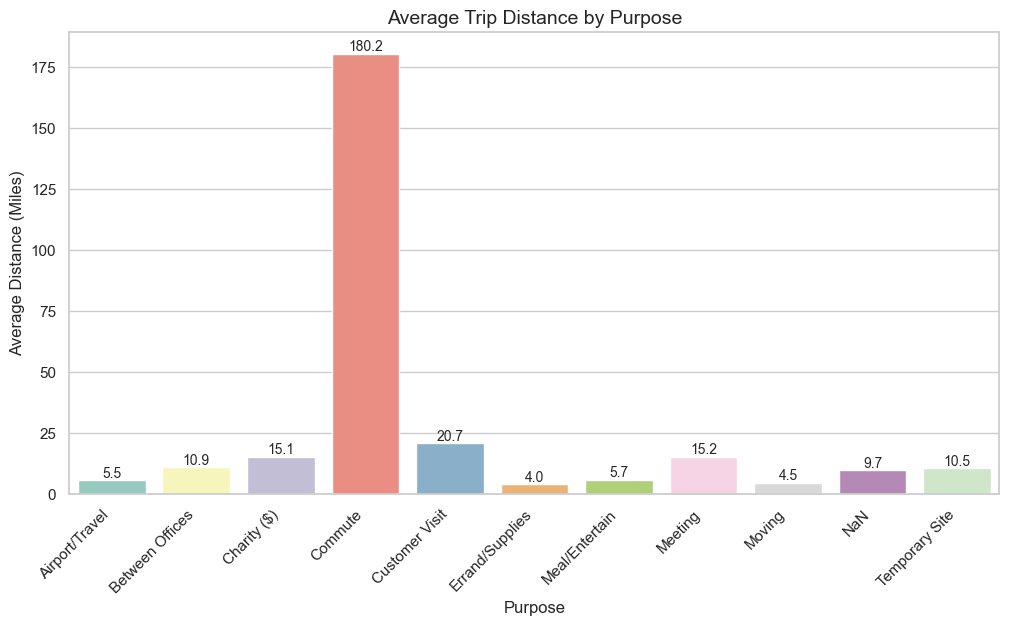


Summary of Average Miles by Purpose:
            PURPOSE       MILES
3           Commute  180.200000
4    Customer Visit   20.688119
7           Meeting   15.247594
2       Charity ($)   15.100000
1   Between Offices   10.944444
10   Temporary Site   10.474000
9               NaN    9.748008
6    Meal/Entertain    5.698125
0    Airport/Travel    5.500000
8            Moving    4.550000
5   Errand/Supplies    3.968750


In [11]:

# Calculate mean MILES by PURPOSE
avg_miles_by_purpose = df_cleaned.groupby('PURPOSE')['MILES'].mean().reset_index()

sns.set_theme(style="whitegrid")

# bar graph of average MILES by PURPOSE
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_miles_by_purpose, x='PURPOSE', y='MILES', hue='PURPOSE', palette='Set3', legend=False)
plt.title('Average Trip Distance by Purpose', fontsize=14)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Average Distance (Miles)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 

# Label exact values on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Save the image
plt.savefig('C:/Users/archi/OneDrive/Documents/Coding/Python/Projects/HexSoftwares_Exploratory_Data_Analysis/visualizations/avg_miles_by_purpose.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary 
print("\nSummary of Average Miles by Purpose:")
print(avg_miles_by_purpose.sort_values(by='MILES', ascending=False))

**Distribution:** From the above visualization, we can see the main purpose of travelling by Uber is for commute by taking the average of the miles travelled grouped by purpose

### Number of Trips by Hour of Day

In [21]:
import plotly.express as px

# Verify df_cleaned and START_DATE
print("Cleaned Dataset Summary:")
print("Total rows:", len(df_cleaned))
print("START_DATE data type:", df_cleaned['START_DATE'].dtype)
print("Missing values in START_DATE:", df_cleaned['START_DATE'].isnull().sum())

# Extract hour from START_DATE
df_cleaned['HOUR'] = df_cleaned['START_DATE'].dt.hour

# Trips coutned by hour
trips_by_hour = df_cleaned.groupby('HOUR').size().reset_index(name='Trip Count')

# # Verify trip counts
# print(trips_by_hour)

# Create line plot with plotly
fig = px.line(trips_by_hour, x='HOUR', y='Trip Count', 
              title='Number of Trips by Hour of Day',
              labels={'HOUR': 'Hour of Day', 'Trip Count': 'Number of Trips'},
              markers=True)

# Update layout 
fig.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="Number of Trips",
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
    title_font_size=14,
    showlegend=False
)


fig.show()

# Save the plot 
fig.write_image('C:/Users/archi/OneDrive/Documents/Coding/Python/Projects/HexSoftwares_Exploratory_Data_Analysis/visualizations/trips_by_hour.png', scale=3)

Cleaned Dataset Summary:
Total rows: 1155
START_DATE data type: datetime64[ns]
Missing values in START_DATE: 0


**Distribution**: Trip frequency peaks during business hours (e.g., 9 AM–5 PM, with highest counts around 13:00–16:00), reflecting the dataset’s focus on Business trips. Fewer trips occur at night (e.g., 0:00–5:00).

### Trips by Hour and Day of Week

Cleaned Dataset Summary:
Total rows: 1155
START_DATE data type: datetime64[ns]
Missing values in START_DATE: 0


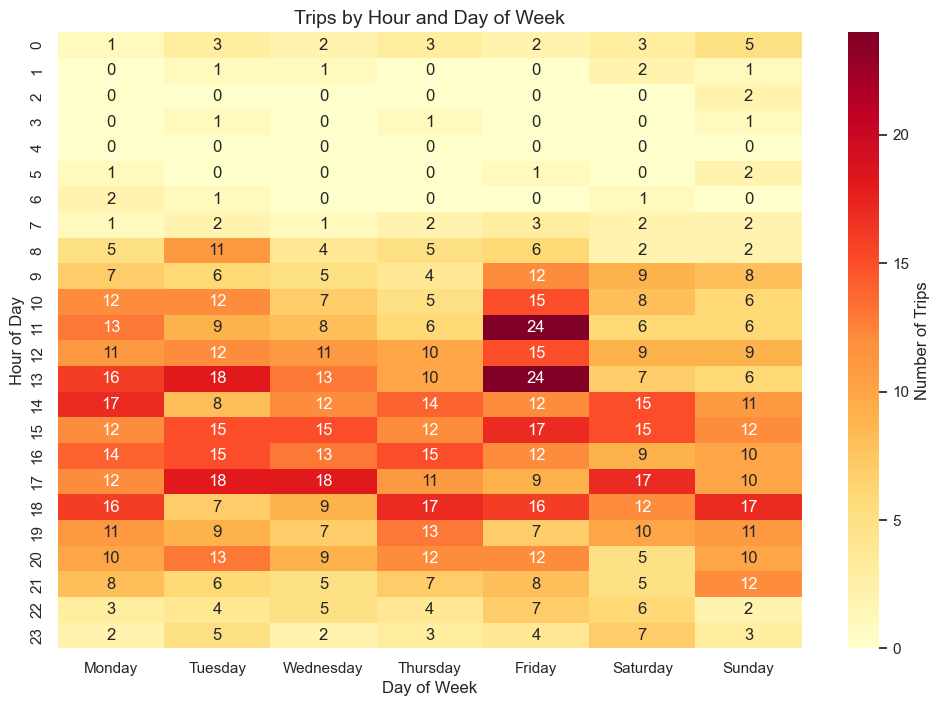

In [22]:
# Verify df_cleaned
print("Cleaned Dataset Summary:")
print("Total rows:", len(df_cleaned))
print("START_DATE data type:", df_cleaned['START_DATE'].dtype)
print("Missing values in START_DATE:", df_cleaned['START_DATE'].isnull().sum())

# Extract hour and day of week from START_DATE
df_cleaned['HOUR'] = df_cleaned['START_DATE'].dt.hour
df_cleaned['DAY_OF_WEEK'] = df_cleaned['START_DATE'].dt.day_name()

# Pivot table for heatmap
pivot_table = df_cleaned.pivot_table(
    index='HOUR',
    columns='DAY_OF_WEEK',
    values='MILES',  # Use any column for counting
    aggfunc='count',
    fill_value=0
).reindex(
    index=range(24),  # 0 to 23 hours
    columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],  # Order days
    fill_value=0
)

# Verify pivot table
# print("\nPivot Table (Trips by Hour and Day of Week):")
# print(pivot_table)

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Number of Trips'})
plt.title('Trips by Hour and Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)

# Save the plot 
plt.savefig('C:/Users/archi/OneDrive/Documents/Coding/Python/Projects/HexSoftwares_Exploratory_Data_Analysis/visualizations/trips_by_hour_day.png', dpi=300, bbox_inches='tight')
plt.show()

- **Distribution**: Trip frequency peaks during weekday business hours (e.g., 9:00–17:00, Monday–Friday), with the highest counts around 13:00–16:00 on weekdays

### Trip Distance vs. Duration

In [23]:
import plotly.express as px

# Verify df_cleaned
print("Cleaned Dataset Summary:")
print("Total rows:", len(df_cleaned))
print("Missing values in MILES:", df_cleaned['MILES'].isnull().sum())
print("Missing values in START_DATE:", df_cleaned['START_DATE'].isnull().sum())
print("Missing values in END_DATE:", df_cleaned['END_DATE'].isnull().sum())

# Trip duration in minutes
df_cleaned['DURATION_MIN'] = (df_cleaned['END_DATE'] - df_cleaned['START_DATE']).dt.total_seconds() / 60

# eliminate invalid durations
df_cleaned = df_cleaned[df_cleaned['DURATION_MIN'].notnull() & (df_cleaned['DURATION_MIN'] >= 0)]
print(f"Rows after filtering invalid durations: {len(df_cleaned)}")

# # Verify duration calculations
# print(df_cleaned['DURATION_MIN'].describe())

# Create scatter plot 
fig = px.scatter(
    df_cleaned,
    x='MILES',
    y='DURATION_MIN',
    title='Trip Distance vs. Duration',
    labels={'MILES': 'Distance (Miles)', 'DURATION_MIN': 'Duration (Minutes)'},
    hover_data=['PURPOSE', 'START', 'STOP']
)

fig.update_layout(
    xaxis_title="Distance (Miles)",
    yaxis_title="Duration (Minutes)",
    title_font_size=14,
    showlegend=False
)


fig.show()

# Save the plot
fig.write_image('C:/Users/archi/OneDrive/Documents/Coding/Python/Projects/HexSoftwares_Exploratory_Data_Analysis/visualizations/miles_vs_duration.png', scale=3)

# Key points summary
print("\nTop 5 Trips by Duration:")
print(df_cleaned[['MILES', 'DURATION_MIN', 'PURPOSE', 'START', 'STOP']].sort_values(by='DURATION_MIN', ascending=False).head())

Cleaned Dataset Summary:
Total rows: 1155
Missing values in MILES: 0
Missing values in START_DATE: 0
Missing values in END_DATE: 0
Rows after filtering invalid durations: 1155



Top 5 Trips by Duration:
     MILES  DURATION_MIN         PURPOSE             START              STOP
776  195.6         336.0             NaN  Unknown Location  Unknown Location
269  310.3         330.0  Customer Visit             Latta      Jacksonville
546  195.3         206.0             NaN       Morrisville        Banner Elk
559  180.2         185.0         Commute             Boone              Cary
881  195.9         181.0             NaN         Asheville            Mebane


**Distribution**: Most trips show a positive correlation between distance and duration, with typical durations of 10–25 minutes for trips under 20 miles. Outliers may indicate traffic or waiting times.